<a href="https://colab.research.google.com/github/Shena2/project/blob/main/section2/project_submit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **다시보기를 추천할만한 영화일까?**

데이터셋을 사용하여 머신러능 모델을 만든 후 성능및 인사이트를 도출 / 공유하는 것  
발표를 듣는 사람은 비데이터 직군

## 1) 데이터 선정 이유 및 문제 정의
데이터를 선정할 때에는 반드시 왜 해당 데이터를 선택했는지에 대한 이유를 자세히 설명해주셔야 합니다.   
데이터셋 선정이 끝났다면 어떤 유형의 문제로 (분류 / 회귀) 접근할지도 결정합니다.

### **Feature Explanation**
- A title : Title and subtitle of film.
- year : Release year of the movie. The data reveal a domain of the year.
- lifetime_gross : Gross sales for national film sales in the United States, not taking inflation into account.
- ratingInteger : Vote on IMDb from 2 to 9.
- ratingCount : Number of voters on the IMDb site.
- duration : Duration of the movie in seconds.
- nrOfWins : Number of prizes won by the movie. It is an indicative number that certifies how many are the prizes won even after
- nrOfNominations : Number of nominations of which the film has not won any prize.
- nrOfPhotos : Number of photos in the IMDb gallery for the movie.
- nrOfNewsArticles : Number of articles written and documented on the film.
- nrOfUserReviews : Number of reviews written by users.
- nrOfGenre : Number of genre.
- Genre : list by one hot incoding. (Action,	Adult,	Adventure,	Animation,	Biography,	Comedy,	Crime,	Documentary,	Drama,	Family,	Fantasy,	Horror,	Music,	Musical,	Mystery,	News,	RealityTV,	Romance,	SciFi,	Short,	Sport, TalkShow,	Thriller,	War,	Western)

In [ ]:
!pip install --upgrade scikit-learn==0.24.1

In [1]:
# 데이터 불러오기
import pandas as pd
df = pd.read_csv('/content/IMDB_data.csv')

df.head()

,title,year,lifetime_gross,ratingInteger,ratingCount,duration,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,nrOfUserReviews,nrOfGenre,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Horror,Music,Musical,Mystery,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
0,METROPOLIS,1927,1236166,8,81007,9180,3,4,67,428,376,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,CITY LIGHTS,1931,19181,9,70057,5220,2,0,38,187,186,3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,MODERN TIMES,1936,163577,9,90847,5220,3,1,44,27,180,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,GONE WITH THE WIND,1939,198676459,8,160414,14280,10,6,143,1263,653,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,THE WIZARD OF OZ,1939,22342633,8,209506,6120,6,12,126,2363,477,3,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [2]:
df.shape

(3749, 37)

### **ML Model**
- linear Regression   
- 평점(숫자)을 통해 추천/비추천

In [3]:
import numpy as np
from pandas import Series
from pandas import DataFrame

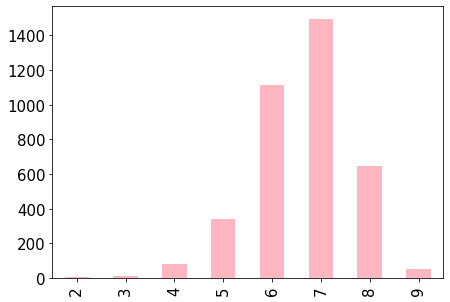

In [4]:
import matplotlib.pyplot as plt

rating_counts = df.value_counts(df['ratingInteger'].values, sort=False)
rating_counts.plot.bar()
rating_counts.plot.bar(grid=False, figsize=(7,5), fontsize=15, color='lightpink')

## 2) 데이터를 이용한 가설 및 평가지표, 베이스라인 선택
데이터를 선정함과 동시에 데이터를 통해서 내가 무엇을 해볼 수 있을지 가설을 세우는 것이 중요합니다.  
가설은 쓸모 있어야 한다는 사실을 잊지마시길 바랍니다.  
데이터 기반의 사고방식, data-driven의 마음가짐을 section1과 2에서 배웠습니다.  
이번에는 그것들을 심화시켜서 문제 해결을 시도 해봅니다.

태스크를 수행한 후, 다음 질문에 대답할 수 있어야 합니다.  
1. 해당 특성을 target으로 지정한 이유를 설명하세요.  
2. 해당 베이스라인 모델과 평가지표를 선택한 이유를 설명하세요

### **가설**
추천 할만한 영화인지 아닌지
- 타겟: ratingInteger
- 베이스라인 선정: mean

In [5]:
# 타겟 지정
target = 'ratingInteger'

# 피처 지정
features = ['year',	'lifetime_gross', 'ratingCount',
       'duration', 'nrOfWins', 'nrOfNominations', 'nrOfPhotos',
       'nrOfNewsArticles', 'nrOfUserReviews', 'nrOfGenre', 'Action', 'Adult',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Horror', 'Music', 'Musical', 'Mystery',
       'News', 'RealityTV', 'Romance', 'SciFi', 'Short', 'Sport', 'TalkShow',
       'Thriller', 'War', 'Western']

In [6]:
# 베이스라인 선택
baseline = df[target].mean()
print('Baseline of ratingInteger:', round(baseline,3))

# 베이스모델 생성
# 평균 이상이명 추천, 아니면 비추천
def reco(x) :
    if x > baseline :
        return 1
    else :
        return 0

basemodel = pd.DataFrame(df[target].apply(lambda x : reco(x)))

# 기준모델 확인
print(pd.Series(basemodel[target]).value_counts(normalize=True))

# 기준모델 정확도 확인
print('Baseline Accuracy Score: 0.584956')

Baseline of ratingInteger: 6.631
1    0.584956
0    0.415044
Name: ratingInteger, dtype: float64
Baseline Accuracy Score: 0.584956


## 3) EDA와 데이터 전처리
가설을 정했고 베이스라인을 만들었다면 데이터의 탐색 및 가공을 시작해봅니다.  
바로 적용이 될 수 있는 데이터도 있겠지만, 대부분의 데이터는 전처리 작업이 필요합니다.  
데이터 전처리를 통해 할 수 있는 것은 다양하지만 다음을 시도해볼 수 있습니다.  
- EDA
- Feature Engineering 
- 데이터의 정규화 
- 노이즈 제거  
- 결측치 제거 혹은 대체  
- 데이터 밸런스  
- 그 외  
  
  
태스크를 수행한 후, 다음 질문에 대답할 수 있어야 합니다.  
1. Data Leakage가 있었나요? 없었다면 어떻게 방지했나요?  
2. 문정언님이 만들고자 하는 모델은 언제 유용한가요? 어떤 한계를 가지고 있나요?

### **데이터 확인**
- 데이터 타입
- 결측치

In [7]:
# 데이터 타입, 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3749 entries, 0 to 3748
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             3749 non-null   object
 1   year              3749 non-null   int64 
 2   lifetime_gross    3749 non-null   int64 
 3   ratingInteger     3749 non-null   int64 
 4   ratingCount       3749 non-null   int64 
 5   duration          3749 non-null   int64 
 6   nrOfWins          3749 non-null   int64 
 7   nrOfNominations   3749 non-null   int64 
 8   nrOfPhotos        3749 non-null   int64 
 9   nrOfNewsArticles  3749 non-null   int64 
 10  nrOfUserReviews   3749 non-null   int64 
 11  nrOfGenre         3749 non-null   int64 
 12  Action            3749 non-null   int64 
 13  Adult             3749 non-null   int64 
 14  Adventure         3749 non-null   int64 
 15  Animation         3749 non-null   int64 
 16  Biography         3749 non-null   int64 
 17  Comedy        

### **EDA**
- 수상
- 장르
- 리뷰

#### 수상

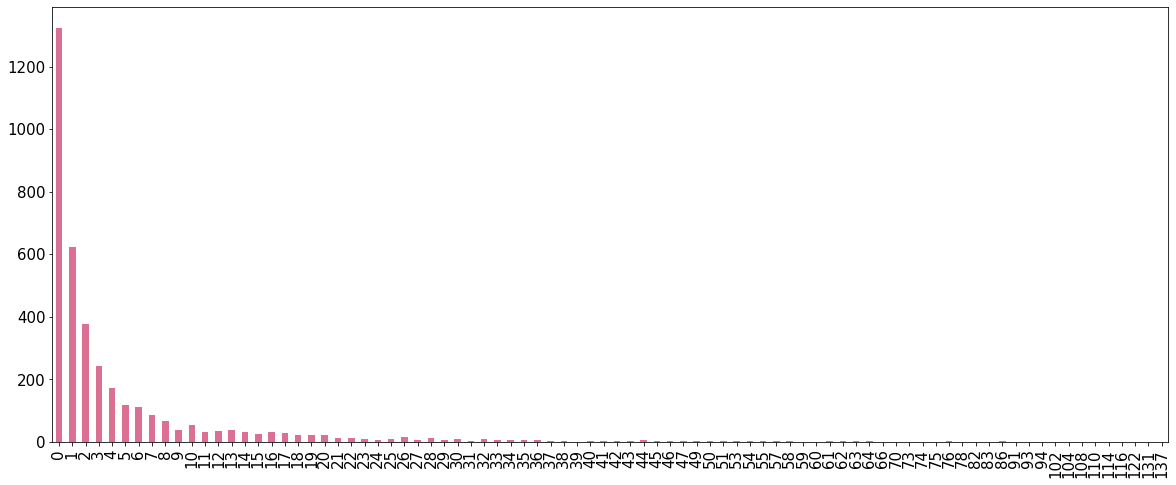

In [8]:
# 상을 몇개나 받았는가
WinsCount = df.value_counts(df['nrOfWins'].values, sort=False)
WinsCount.plot.bar()
WinsCount.plot.bar(grid=False, figsize=(20,8), fontsize=15, color='palevioletred')

1    2425
0    1324
Name: WinsorNot, dtype: int64


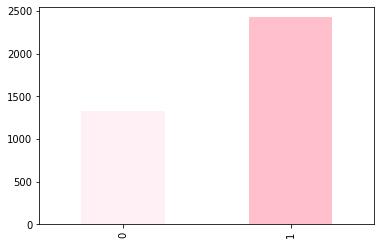

In [9]:
# 수상 여부
def func(x) :
    if x > 0 :
        return 1
    else :
        return 0

df['WinsorNot'] = df['nrOfWins'].apply(lambda x : func(x))

print(pd.Series(df['WinsorNot']).value_counts()) # 합계
colors = ['lavenderblush', 'pink']
WinsCount1 = df.value_counts(df['WinsorNot'].values, sort=False)
WinsCount1.plot.bar(color=colors)

#### 장르

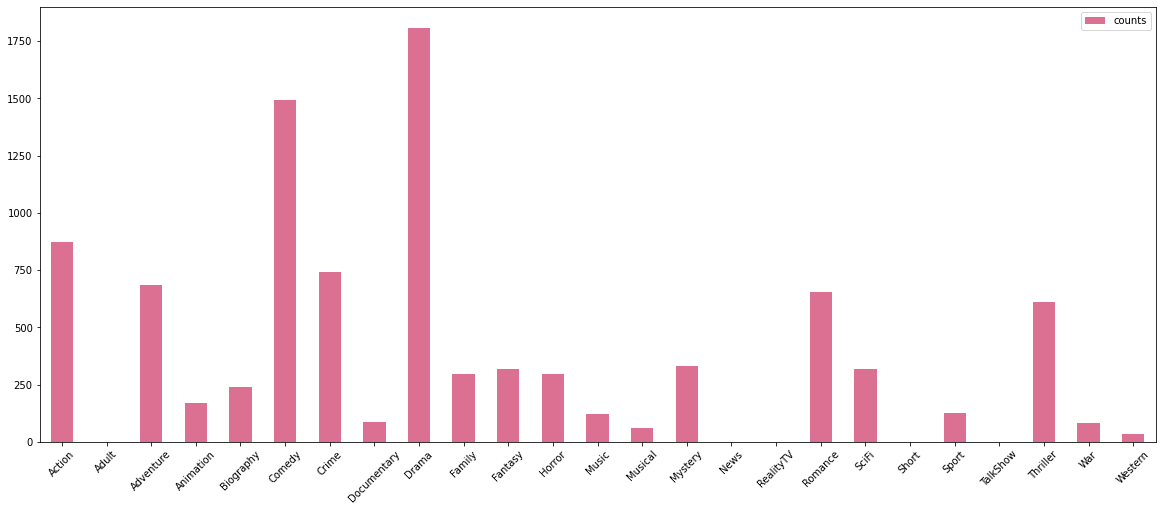

In [10]:
# 장르 분포 확인
count1 = df.iloc[:, 12:-1]
genr_count = count1.sum(axis=0).to_frame()
genr_count.columns = ['counts']
genr_count.plot.bar(rot=45, figsize=(20,8), color='palevioletred')

#### 리뷰

0    2621
1    1128
Name: overReview, dtype: int64


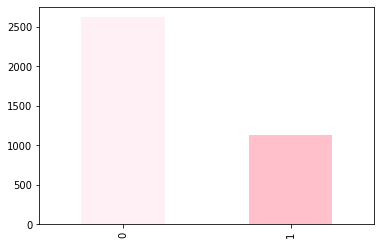

In [11]:
# 평균값 확인
review_mean = df['nrOfUserReviews'].mean()
review_mean

# 평균 이상의 리뷰 가진 영화 개수
def re_mean_over(x) :
    if x > review_mean :
        return 1
    else :
        return 0

df['overReview'] = df['nrOfUserReviews'].apply(lambda x : re_mean_over(x))

print(pd.Series(df['overReview']).value_counts()) # 합계
colors = ['lavenderblush', 'pink']
overReview1 = df.value_counts(df['overReview'].values, sort=False)
overReview1.plot.bar(color=colors)

### **Correlation**
- 'year', 'nrOfGenre' 제외 (음수 값)

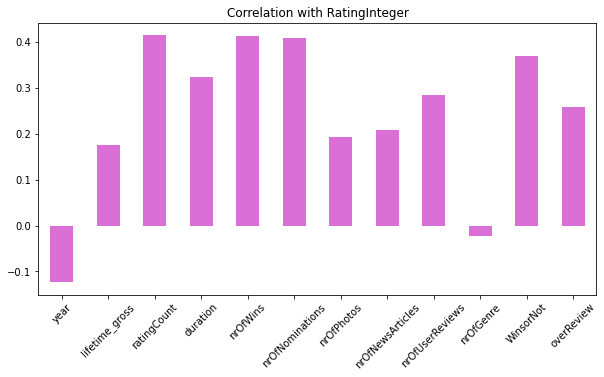

In [12]:
# 변수간 상관계수 확인 (장르 제외)
features2 = ['ratingInteger', 'year',	'lifetime_gross', 'ratingCount',
             'duration', 'nrOfWins', 'nrOfNominations', 'nrOfPhotos',
             'nrOfNewsArticles', 'nrOfUserReviews', 'nrOfGenre',
             'WinsorNot', 'overReview']

df2 = df[features2]
corr = df2.corr()
corr_gh = corr.iloc[0, 1:13]
corr_gh.plot.bar(rot=45, figsize=(10,5), color='orchid', title='Correlation with RatingInteger')

### **Feature Engineering**
- 원핫인코딩 모두 되어있음  
- EDA할 때 적절한 변수 생성함  
- 특성공학은 생략  

## 4) 머신러닝 방식 적용 및 교차검증
데이터의 탐색과 전처리 작업이 끝났다면 모델링을 통해 베이스라인과의 성능 비교를 해봅니다.  
Linear / Tree-based / Ensemble 모델을 학습하세요. (다양하게 시도해보시는 걸 추천합니다.)  
평가지표를 계산 후 베이스라인과 비교해보세요.  
어느정도 성능이 나왔다면, 교차 검증 (이하 CV)을 통해서 일반화될 가능성이 있는지 확인해봅니다.  
모델 성능을 개선하기 위한 다양한 방법을 적용해보세요. (Hyperparameter tuning, etc.)  
최소 2개 이상의 모델을 만들어서 validation 점수를 보고하세요.  
최종 모델의 test 점수를 보고하세요.  

태스크를 수행한 후, 다음 질문에 대답할 수 있어야 합니다.  
1. 모델을 학습한 후에 베이스라인보다 잘 나왔나요? 그렇지 않다면 그 이유는 무엇일까요?  
2. 모델 성능 개선을 위해 어떤 방법을 적용했나요? 그 방법을 선택한 이유는 무엇인가요?  
3. 최종 모델에 관해 설명하세요.

### **Modeling**
- pipeline
- XGBoost
- lightgbm

#### 데이터 나누기

In [13]:
features_final = ['lifetime_gross', 'ratingCount', 'duration', 'nrOfWins', 
                  'nrOfNominations', 'nrOfPhotos', 'nrOfNewsArticles', 
                  'nrOfUserReviews']

In [ ]:
, 'Action', 'Adult', 'Adventure', 
                  'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 
                  'Drama', 'Family', 'Fantasy', 'Horror', 'Music', 'Musical', 
                  'Mystery', 'News', 'RealityTV', 'Romance', 'SciFi', 'Short', 
                  'Sport', 'TalkShow', 'Thriller', 'War', 'Western'

In [15]:
# 훈련/테스트 데이터 나누기
from sklearn.model_selection import train_test_split

X = df[features_final]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=2)

# 훈련/검증 데이터 나누기
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, random_state=2)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(2399, 8)
(600, 8)
(750, 8)


#### sklearn

In [16]:
from sklearn.linear_model import LinearRegression

X_train1 = X_train
X_test1 = X_test
X_val1 = X_val

# 선형회귀 모델
model = LinearRegression()

# 모델 학습
model.fit(X_train1, y_train)

print('Accuray score: ', model.score(X_train1, y_train))

# 테스트 피쳐 데이터를 앞서 훈련한 모델에 넣어 예측값 도출
y_pred_linear = model.predict(X_val1)

from sklearn.metrics import mean_absolute_error
linear_mae = mean_absolute_error(y_val, y_pred_linear)

print("MAE :", linear_mae)

Accuray score:  0.2903517845590745
MAE : 0.71276544252494


In [17]:
from sklearn.linear_model import RidgeCV

X_train2 = X_train
X_test2 = X_test
X_val2 = X_val

# 주어진 알파값을 리스트에 담기
alphas = [0.001, 0.01, 0.1, 1, 10] 

# ridgeCV 모델
ridge = RidgeCV(alphas=alphas, normalize=True, cv=5)

# 모델 학습
ridge.fit(X_train2, y_train)

# 가장 좋은 점수 및 해당 알파값 도출
print("alpha :", ridge.alpha_)
print("best score :", ridge.best_score_)

# 테스트 피쳐 데이터를 앞서 훈련한 모델에 넣어 예측값 도출
y_pred_ridge = ridge.predict(X_val2)

# 테스트 타깃 데이터와 예측 데이터를 가지고 평균 절대 오차 구하기 
from sklearn.metrics import mean_absolute_error
ridge_mae = mean_absolute_error(y_val, y_pred_ridge)

print("MAE :", ridge_mae)

alpha : 0.01
best score : 0.2852526733246645
MAE : 0.7127243738173502


#### XGBoost

In [29]:
import xgboost

X_train3 = X_train
X_test3 = X_test
X_val3 = X_val

xgb_model = xgboost.XGBRegressor(n_estimators=1000, 
                                 learning_rate=0.05,
                                 max_depth=20)

# 모델 학습
xgb_model.fit(X_train3, y_train)

y_pred_xgb = xgb_model.predict(X_val3)

xgb_mae = mean_absolute_error(y_val, y_pred_xgb)

print("MAE :", xgb_mae)

[08:29:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE : 0.630886218547821


#### lightgbm

In [19]:
! pip install lightgbm

In [20]:
import lightgbm as lgb

X_train4 = X_train
X_test4 = X_test
X_val4 = X_val

train_ds = lgb.Dataset(X_train4, label = y_train) 
test_ds = lgb.Dataset(X_test4, label = y_test) 

params = {'learning_rate': 0.01, 
          'num_iterations' : 10000,
          'max_depth': 25,
          'boosting': 'dart', 
          'objective': 'regression', 
          'metric': 'mae'}

lgb_model = lgb.train(params, train_ds, 1000, test_ds, 
                      verbose_eval=100, early_stopping_rounds=100)
y_pred_lgb_train = lgb_model.predict(X_train4)
y_pred_lgb = lgb_model.predict(X_val4)

lgb_mae = mean_absolute_error(y_val, y_pred_lgb)
print("MAE :", lgb_mae)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid_0's l1: 2.51343
[200]	valid_0's l1: 2.87004
[300]	valid_0's l1: 2.33548
[400]	valid_0's l1: 1.88396
[500]	valid_0's l1: 1.54474
[600]	valid_0's l1: 1.47854
[700]	valid_0's l1: 1.3256
[800]	valid_0's l1: 1.26576
[900]	valid_0's l1: 1.11076
[1000]	valid_0's l1: 1.05679
[1100]	valid_0's l1: 1.01215
[1200]	valid_0's l1: 1.02193
[1300]	valid_0's l1: 0.948179
[1400]	valid_0's l1: 0.855198
[1500]	valid_0's l1: 0.863368
[1600]	valid_0's l1: 0.789434
[1700]	valid_0's l1: 0.776149
[1800]	valid_0's l1: 0.775766
[1900]	valid_0's l1: 0.740515
[2000]	valid_0's l1: 0.740294
[2100]	valid_0's l1: 0.700084
[2200]	valid_0's l1: 0.689892
[2300]	valid_0's l1: 0.678834
[2400]	valid_0's l1: 0.659829
[2500]	valid_0's l1: 0.671394
[2600]	valid_0's l1: 0.682065
[2700]	valid_0's l1: 0.67701
[2800]	valid_0's l1: 0.693314
[2900]	valid_0's l1: 0.685962
[3000]	valid_0's l1: 0.665013
[3100]	valid_0's l1: 0.65423
[3200]	valid_0's l1: 0.656923
[3300]	valid_0's l1: 0.644693
[3400]	valid_0's l1: 0.626502
[350

In [25]:
y_pred_xgb2 = xgb_model.predict(X_test3)

xgb_mae2 = mean_absolute_error(y_test, y_pred_xgb2)

print("MAE :", xgb_mae2)

MAE : 0.6143295485178629


## 5) 머신러닝 모델 해석
프로젝트에서 가장 중요하다고 볼 수 있는 부분 입니다.  

우리는 SHAP, PDP 등을 통해서 모델이 관측치를 어떤 특성을 활용했거나,   
어떤 특성이 타겟에 영향을 끼쳤는지 등을 해석하는 방법에 대해서 배웠습니다.  
여러분의 프로젝트에도 이러한 해석 방법을 활용한 머신러닝 모델을  
비전문가라도 조금 더 쉽게 이해하고 접근할 수 있도록 해주셔야 합니다.  

PDP, SHAP을 활용하여 최종 모델을 설명합니다.  
시각화는 "설명"이 제일 중요합니다.  

태스크를 수행한 후, 다음 질문에 대답할 수 있어야 합니다.  
1. 모델이 관측치를 예측하기 위해서 어떤 특성을 활용했나요?
2. 어떤 특성이 있다면 모델의 예측에 도움이 될까요? 해당 특성은 어떻게 구할 수 있을까요?

In [27]:
! pip install shap

     |████████████████████████████████| 358kB 7.4MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491629 sha256=e7960a98685c3c4f14481bf07c4eb2bb625c0d2e19c893321c769936e01b3774
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [31]:
import shap

# compute SHAP values
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train3)

TypeError: ignored

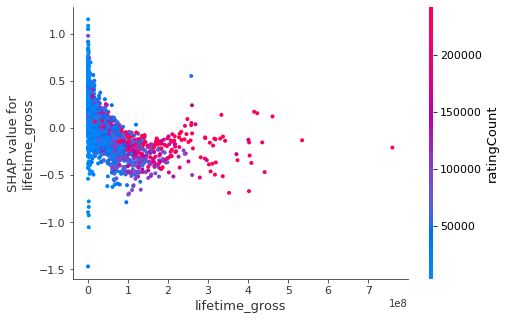

In [34]:
shap.dependence_plot(0, shap_values, X_train3)